<a href="https://colab.research.google.com/github/Ajinkya626/Macdonalds-Case-Study/blob/main/McDonalds_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#clustering model library
from sklearn.cluster import KMeans

In [2]:
food=pd.read_csv("https://raw.githubusercontent.com/Ajinkya626/Datasets/main/mcdonalds.csv")
food.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
#convert yes and no values to binary(Categorical Encoding)
food = food.replace(to_replace = ['Yes','No'],value = [1,0])
food

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


## **Data Visualisation**

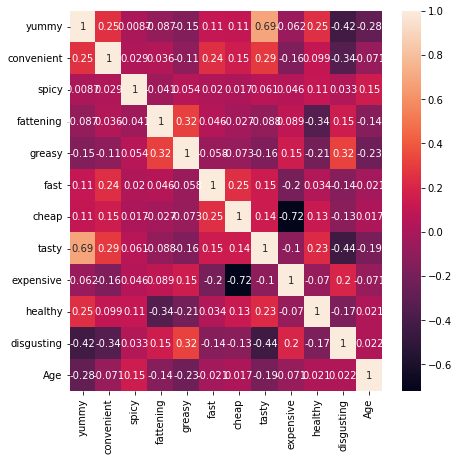

In [4]:
#heatmap to study correlation between variables
plt.figure(figsize=(7,7))
sns.heatmap(food.corr(), annot=True)
plt.show()

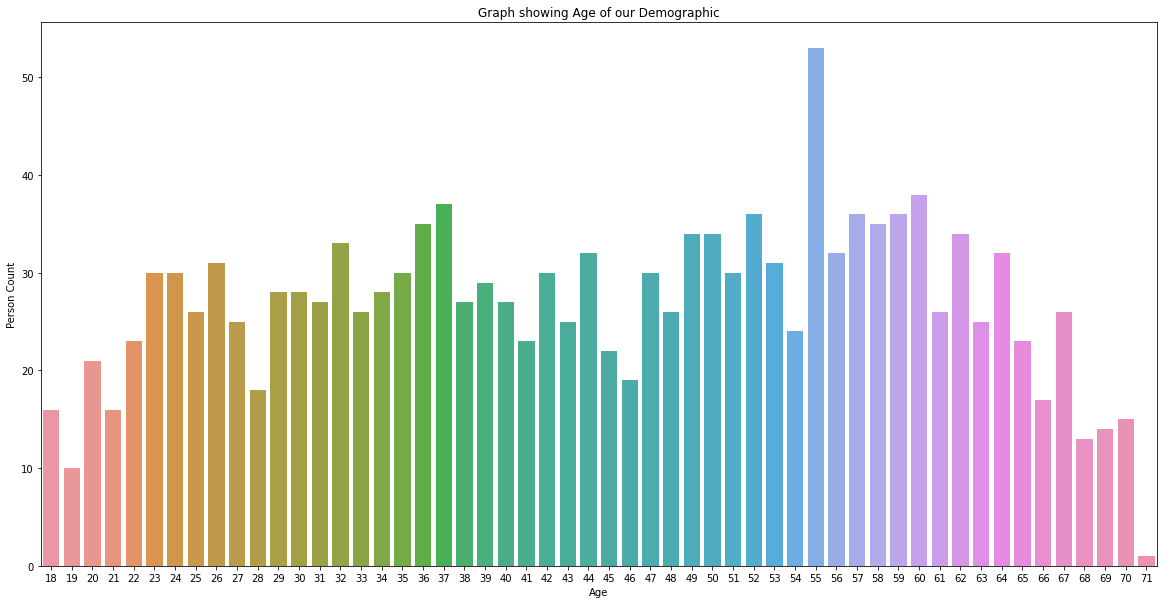

In [5]:
#plotting age of customers
plt.figure(figsize=(20,10))
sns.countplot(x=food.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.title('Graph showing Age of our Demographic')
plt.show()

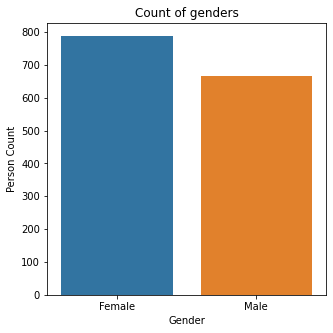

In [6]:
#plotting count of genders
plt.figure(figsize=(5,5))
sns.countplot(x=food.Gender)
plt.xlabel("Gender")
plt.ylabel("Person Count")
plt.title('Count of genders')
plt.show()

## **Applying Feature Extraction Technique: PCA**

In [7]:
temp=food[['VisitFrequency','Gender','Like','Age']]
food=food.drop(['VisitFrequency','Gender','Like','Age'], axis = 1)

pca = PCA(n_components=11)

principalComponents = pca.fit_transform(X = food)

# to get how much variance was retained
print(pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [8]:
#create dataframe of pca 
pca_food = pd.DataFrame(data = principalComponents
                        , columns = ['pca 1', 'pca 2','pca 3', 'pca 4','pca 5', 'pca 6','pca 7', 'pca 8','pca 9', 'pca 10','pca 11'])
pca_food.tail()

,pca 1,pca 2,pca 3,pca 4,pca 5,pca 6,pca 7,pca 8,pca 9,pca 10,pca 11
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316
1452,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076


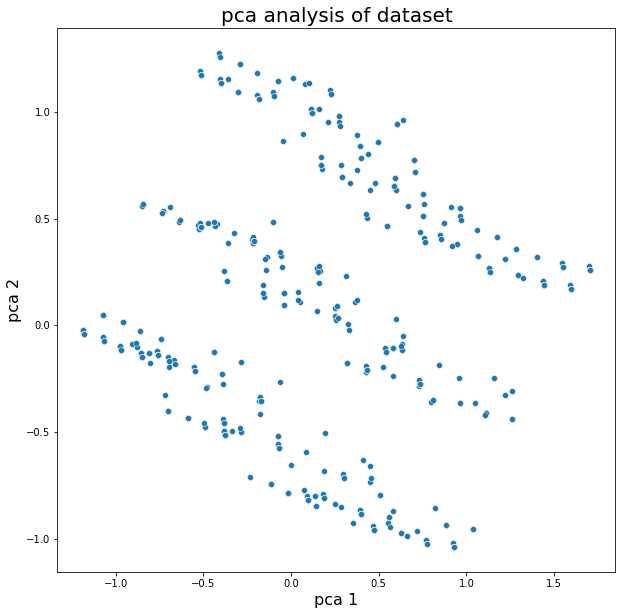

In [9]:
#plot betweeen first and second principle component

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="pca 1", y="pca 2",
    palette=sns.color_palette("hls", 10),
    data=pca_food[['pca 1','pca 2']]
)
plt.xlabel('pca 1',fontsize=16)
plt.ylabel('pca 2',fontsize=16)
plt.title('pca analysis of dataset',fontsize=20)
plt.show()

In [10]:
#relation between principle components and original variables
loadings=np.round(pca.components_.T * np.sqrt(pca.explained_variance_),3)
print(loadings)

[[-0.361  0.221 -0.154  0.022 -0.104  0.053 -0.081  0.004  0.152 -0.027
   0.011]
 [-0.118  0.01  -0.032 -0.057  0.094 -0.108 -0.017 -0.031 -0.005 -0.166
  -0.128]
 [-0.005  0.011 -0.019  0.079  0.024 -0.11   0.205  0.103  0.106 -0.019
   0.034]
 [ 0.088 -0.021 -0.163 -0.141 -0.025 -0.126 -0.112  0.162 -0.043 -0.001
   0.059]
 [ 0.23  -0.039 -0.405  0.101  0.122  0.065  0.01  -0.038 -0.001  0.002
   0.   ]
 [-0.082 -0.053 -0.033 -0.039  0.036 -0.184 -0.025 -0.173  0.044  0.06
   0.08 ]
 [-0.255 -0.371 -0.075  0.047 -0.044 -0.032 -0.012  0.039  0.02   0.107
  -0.116]
 [-0.357  0.187 -0.145 -0.001 -0.071 -0.024  0.104 -0.02  -0.17   0.02
   0.005]
 [ 0.249  0.365  0.012  0.027 -0.001 -0.081 -0.02   0.008  0.018  0.113
  -0.116]
 [-0.162  0.047  0.097  0.304  0.097 -0.055 -0.101  0.049 -0.049 -0.009
   0.037]
 [ 0.284 -0.085 -0.045  0.147 -0.246 -0.065 -0.008 -0.046 -0.019 -0.072
  -0.01 ]]


## **Applying Algorithms**

### **K-Means Algorithm**

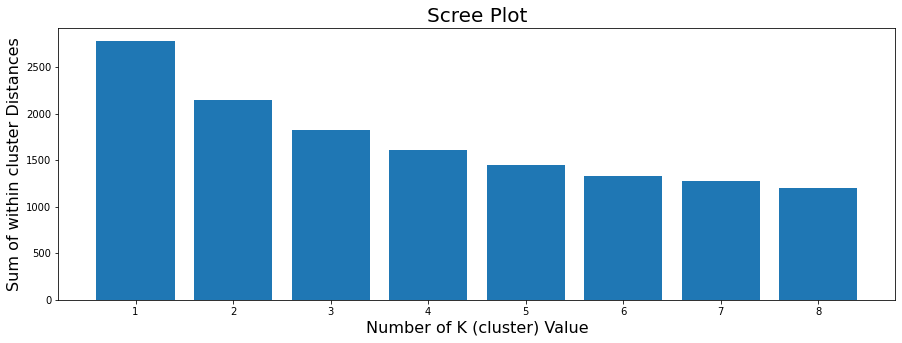

In [12]:
#find best value for k
distortion=[]
for k in range(1,9):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(food)
    distortion.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.bar(range(1,9),distortion)
plt.title('Scree Plot',fontsize=20)
plt.xlabel("Number of K (cluster) Value",fontsize=16)
plt.ylabel("Sum of within cluster Distances",fontsize=16)
plt.show()

Taking Value of K = 4


In [15]:
#We save our final cluster model from the kmeans algorithm 
kmeansfinal = KMeans(n_clusters=4)
kmeansfinal.fit(food)

KMeans(n_clusters=4)

In [16]:
#adding descriptor variables back to our dataset along with cluster of each datapoint
food[['VisitFrequency','Age','Like','Gender']]=temp[['VisitFrequency','Age','Like','Gender']]
food['cluster']=kmeansfinal.labels_
food.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,VisitFrequency,Age,Like,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,Every three months,61,-3,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,Every three months,51,+2,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,Every three months,62,+1,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,Once a week,69,+4,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,Once a month,49,+2,Male,3


Plotting Extracted Information


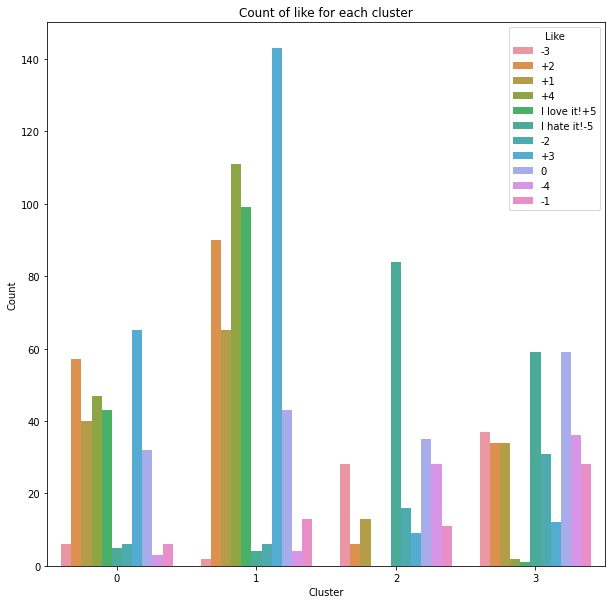

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='Like',data=food)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of like for each cluster")
plt.show()

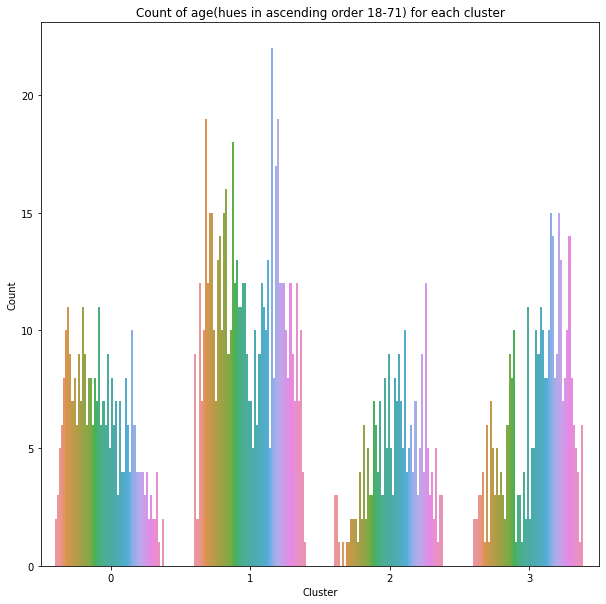

In [18]:
plt.figure(figsize=(10,10))
g=sns.countplot(x='cluster',hue='Age',data=food)
g.legend_.remove()
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of age(hues in ascending order 18-71) for each cluster")
plt.show()

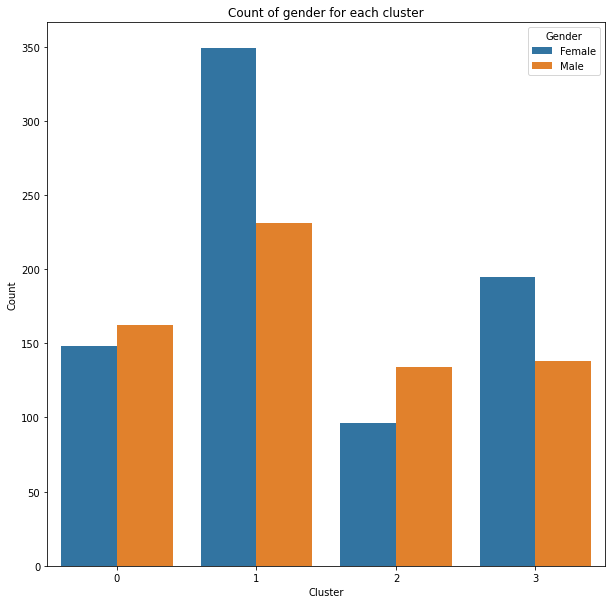

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='Gender',data=food)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of gender for each cluster")
plt.show()

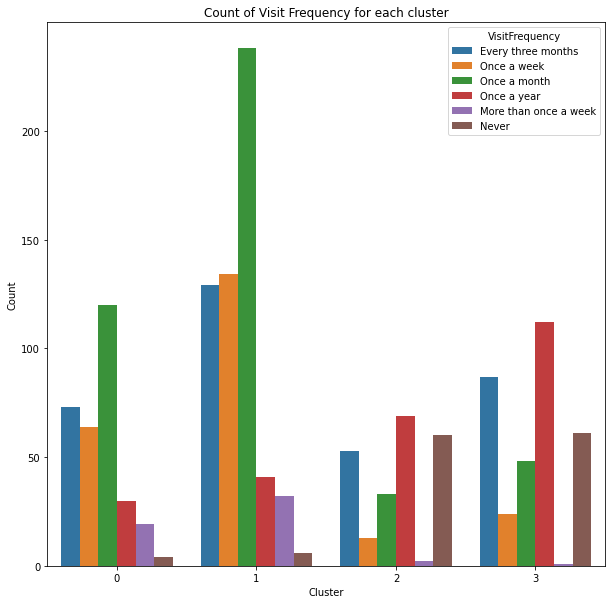

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='cluster',hue='VisitFrequency',data=food)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Count of Visit Frequency for each cluster")
plt.show()